Dataset Shape: (569, 31)

First 5 Rows of Dataset:

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst te

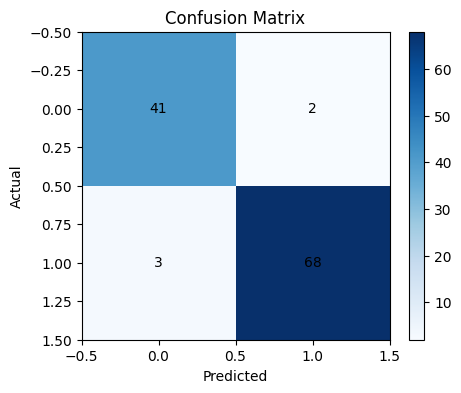

In [1]:

import numpy as np

import pandas as pd
from sklearn.datasets import load_breast_cancer


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import matplotlib.pyplot as plt


data = load_breast_cancer()
X = data.data


y =data.target
df = pd.DataFrame(X, columns=data.feature_names)


df['Target'] = y


print("Dataset Shape:", df.shape)


print("\nFirst 5 Rows of Dataset:\n")


print(df.head())


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


svm_model = SVC(kernel='linear')

svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)

print("\nModel Accuracy:", accuracy_score(y_test, y_pred))


print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(5, 4))

plt.imshow(cm, cmap='Blues')
plt.title("Confusion Matrix")


plt.xlabel("Predicted")


plt.ylabel("Actual")


plt.colorbar()

for i in range(len(cm)):
    for j in range(len(cm)):
        plt.text(j, i, cm[i][j], ha='center', va='center')


plt.show()